# Predicting Customer Churn in a Telecommunications Company


Objective:
The primary objective of this project is to develop a predictive model that can identify
customers at risk of churning, enabling the company to take proactive measures to retain
them.

Steps involved in this project:
1. Data Collection and Processing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Building the Churn Prediction Model
5. Model Evalution
6. Calculating Accuracy Precision recall and f1 score

### Importing the dependecies

In [911]:
#importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score,accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

## 1.Data Collection and Processing

#### 1.1  Load the Data

In [912]:
#loading the csv data to Pandas DataFrame
df =pd.read_csv('/content/data.csv')

In [913]:
#print first 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [914]:
# Print last 5 rows of DataFrame
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [915]:
#numbers of rows and columns
df.shape

(7043, 21)

In [916]:
#getting some info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [917]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 1.2  Handle Missing Values

In [918]:
#checking for the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Since there are no null value we doesn't have to perform any operation to handel missing values

#### 1.3 Encode Categorical Variables

In [919]:
# Identify categorical columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns


In [920]:
# Count the number of categorical columns
num_categorical= len(categorical_col)

# Print the result
print(f'Number of categorical columns: {num_categorical}')
print('Categorical columns:', list(categorical_col))

Number of categorical columns: 18
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [921]:
## Gettting the unique values From Each columns
def get_unique_values(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()
    return unique_values

# Get unique values for each column
unique_values = get_unique_values(df)

# Display the unique values
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique values: {values}\n")

Column: customerID
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
Unique values: ['Female' 'Male']

Column: SeniorCitizen
Unique values: [0 1]

Column: Partner
Unique values: ['Yes' 'No']

Column: Dependents
Unique values: ['No' 'Yes']

Column: tenure
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
Unique values: ['No' 'Yes']

Column: MultipleLines
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique val

##### Now we have to convert the Categorical Column to Numerical Column

##### 1.3.1 Now we will find which column contains YES and NO values for the further procedure

In [922]:
# Function to identify columns with 'Yes' and 'No' values
def YesNO_columns(df):
    yes_no_columns = []
    for column in df.columns:
        unique_values = df[column].dropna().unique()
        if set(unique_values) == {'Yes', 'No'} or set(unique_values) == {'No', 'Yes'}:
            yes_no_columns.append(column)
    return yes_no_columns

# Get columns with 'Yes' and 'No' values
yes_no_columns = YesNO_columns(df)

# Print the result
print(f'Columns with Yes and No values: {yes_no_columns}')

Columns with Yes and No values: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


##### Now we have to convert the YES and NO value to numerical form where <br>
NO  --> 0 <br>
YES -->1

In [923]:
# Get columns with 'Yes' and 'No' values
yesNO_columns = YesNO_columns(df)

# Convert 'Yes' to 1 and 'No' to 0 in identified columns
df[yesNO_columns] = df[yesNO_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Print the updated DataFrame
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to

In [924]:
# coverting the Male-->1 And Female -->0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

##### 1.3.2  Now we will convert the categorical column to numerical for those column which contain No,Yes,No internet service such as <br>
 OnlineSecurity <br>
 OnlineBackup<br>
 DeviceProtection <br>
 TechSupport<br>
 StreamingTV<br>
 StreamingMovies<br>
<br>
No-->0<br>
yes-->1<br>
No internet service-->2

In [925]:
# Define the mapping dictionary
mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}

# Columns to apply the mapping
columns_to_map = ['OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Apply the mapping to the specified columns
df[columns_to_map] = df[columns_to_map].applymap(lambda x: mapping.get(x, x))

# Print the updated DataFrame to verify the changes
print(df[columns_to_map].head())

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies  
0                0  
1                0  
2                0  
3                0  
4                0  


##### 1.3.3  Now we will convet MultipleLines column values
in <br>
Yes--> 1<br>
No--> 2 <br>
No phone service-->2


In [926]:
# Define the mapping dictionary
multiple_lines_mapping = {'Yes': 1, 'No': 0, 'No phone service': 2}

# Apply the mapping to the MultipleLines column
df['MultipleLines'] = df['MultipleLines'].map(multiple_lines_mapping)

# Print the updated DataFrame to verify the changes
print(df['MultipleLines'].head())

0    2
1    0
2    0
3    2
4    0
Name: MultipleLines, dtype: int64


##### 1.3.4  Now we will convert InternetService
DSL--> 1<br>
No--> 0 <br>
Fiber optic-->2


In [927]:
# Define the mapping dictionary
InternetService_mapping = {'DSL': 1, 'No': 0, 'Fiber optic': 2}

# Apply the mapping to the InternetServices column
df['InternetService'] = df['InternetService'].map(InternetService_mapping)

# Print the updated DataFrame to verify the changes
print(df['InternetService'].head())

0    1
1    1
2    1
3    1
4    2
Name: InternetService, dtype: int64


##### 1.3.5  Now we will convert Contract
Month-to-month--> 1<br>
One year--> 0 <br>
Two year-->2



In [928]:
# Define the mapping dictionary
Contract_mapping = {'Month-to-month': 1, 'One year': 0, 'Two year': 2}

# Apply the mapping to the Contract column
df['Contract'] = df['Contract'].map(Contract_mapping)

# Print the updated DataFrame to verify the changes
print(df['Contract'].head())

0    1
1    0
2    1
3    0
4    1
Name: Contract, dtype: int64


##### 1.3.6  Now we will convert PaymentMethod
Electronic check--> 1<br>
Mailed check--> 0 <br>
Bank transfer (automatic)-->2<br>
redit card (automatic)-->3


In [929]:
# Define the mapping dictionary
PaymentMethod_mapping = {'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2,'Credit card (automatic)':3}

# Apply the mapping to the Contract column
df['PaymentMethod'] = df['PaymentMethod'].map(PaymentMethod_mapping)

# Print the updated DataFrame to verify the changes
print(df['PaymentMethod'].head())

0    1
1    0
2    0
3    2
4    1
Name: PaymentMethod, dtype: int64


In [930]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,1,1,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,0,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,0,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,1,1,1,70.70,151.65,1


In [931]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [932]:
df.drop_duplicates(inplace=True)

###1.4 Checking For outliers

##### using Z score Method

In [933]:
def detect_outliers_zscore(df, threshold=3):
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outlier_counts[col] = np.sum(np.abs(z_scores) > threshold)
    return outlier_counts

outliers_zscore = detect_outliers_zscore(df)
print(outliers_zscore)


{'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 682, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'Churn': 0}


Using IQR method

In [934]:

def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    return outlier_counts

outliers_iqr = detect_outliers_iqr(df)
print(outliers_iqr)


{'gender': 0, 'SeniorCitizen': 1142, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 682, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 3168, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'Churn': 0}


According to both Outlier detection method we have seen that in Z Score method <br>
we have found outliers as **PhoneService: 682 ** contribution to data =9.6% ** <br>
and according to IQR method we have SeniorCitizen: 1142  ** contribution to data =16 %**  <br>
Contract: 3168   ** contribution to data =44% **

so according to above data we have to drop the contract column and perform the outlier reomval method on other outlier column

##### Removing the Contract Column

In [935]:
df = df.drop('Contract', axis=1)

#### Now We replace the outlier data with median value

In [936]:
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return df

df = replace_outliers(df, 'PhoneService')
df = replace_outliers(df, 'SeniorCitizen')



#### 1.5 checking for duplicates rows

In [937]:
# Find duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

# Count total number of duplicate rows
total_duplicates = duplicate_rows.shape[0]

# Display duplicate rows
print("\nDuplicate Rows:")
print(duplicate_rows)

# Display total number of duplicate rows
print("\nTotal number of duplicate rows:", total_duplicates)




Duplicate Rows:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

Total number of duplicate rows: 0


Since there are  0 duplicates rows we have to do notthing

## 2. Exploratory Data Analysis (EDA)

#### 2.1: Understand Data Distribution

In [938]:
# Summary statistics
print(df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000         7043.0  7043.000000  7043.000000  7043.000000   
mean      0.504756            0.0     0.483033     0.299588    32.371149   
std       0.500013            0.0     0.499748     0.458110    24.559481   
min       0.000000            0.0     0.000000     0.000000     0.000000   
25%       0.000000            0.0     0.000000     0.000000     9.000000   
50%       1.000000            0.0     0.000000     0.000000    29.000000   
75%       1.000000            0.0     1.000000     1.000000    55.000000   
max       1.000000            0.0     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count        7043.0    7043.000000      7043.000000     7043.000000   
mean            1.0       0.615505         1.222916        0.720006   
std             0.0       0.656039         0.778877        0.796885   
min             1.0       0.000

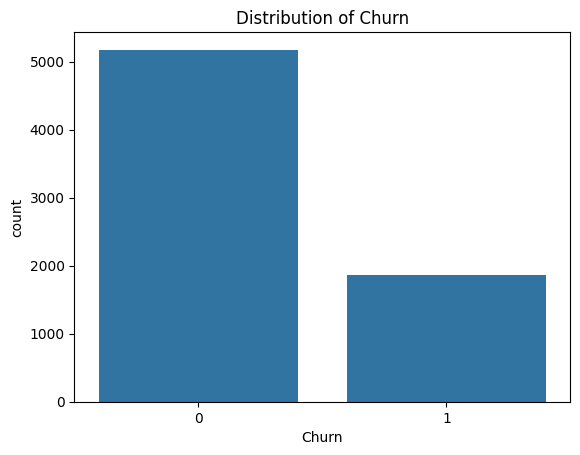

In [939]:
# Distribution of target variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()


### 2.2: Identify Relationships

customerID           object
gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure                int64
PhoneService        float64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


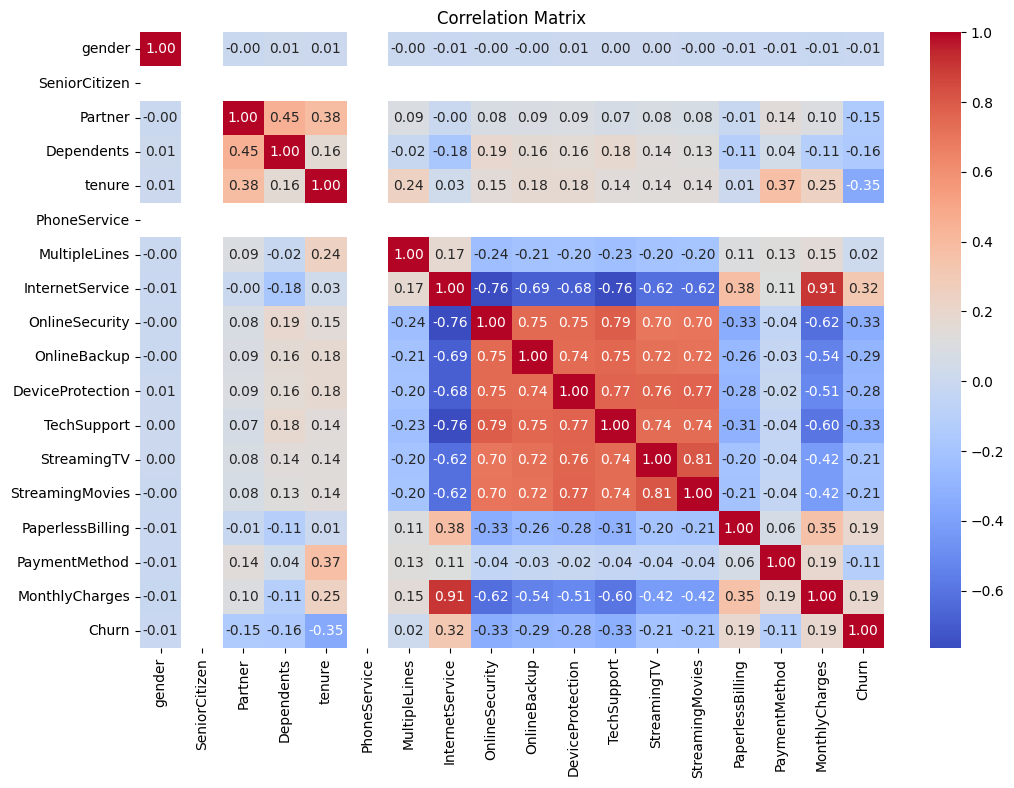

In [940]:
# Check the data types of each column
print(df.dtypes)

numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


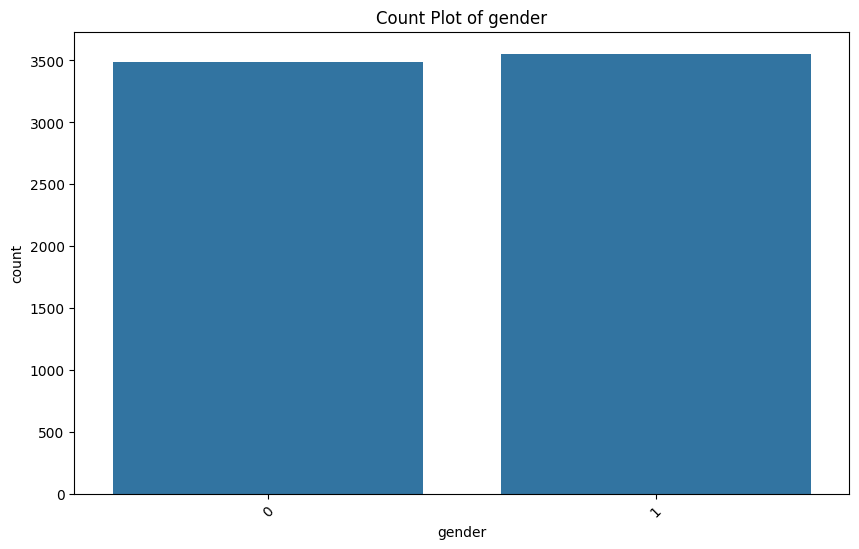

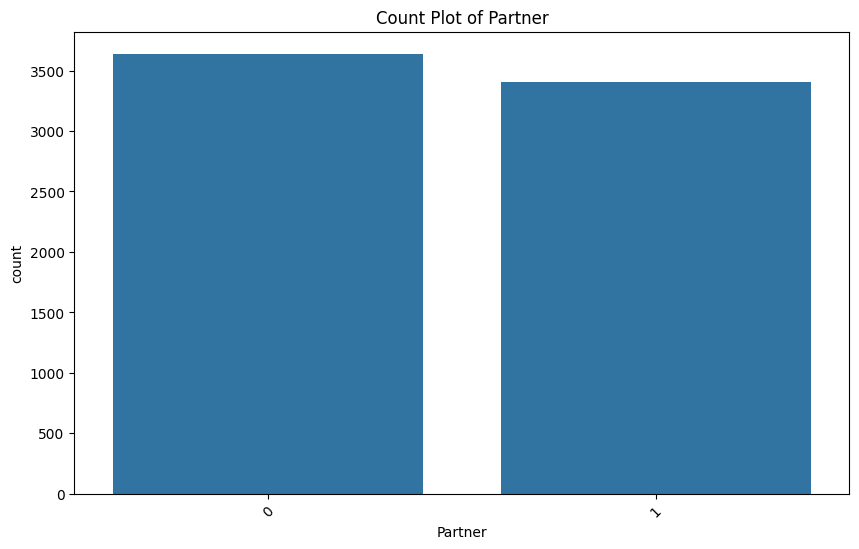

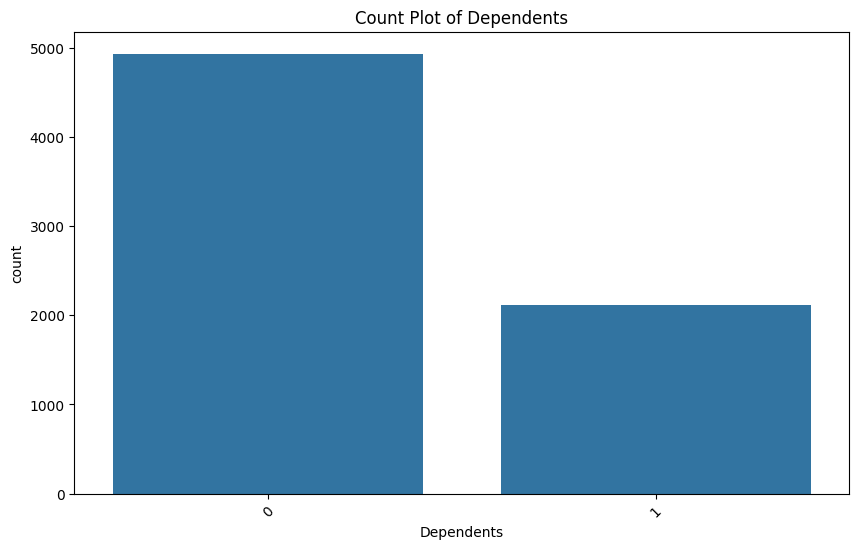

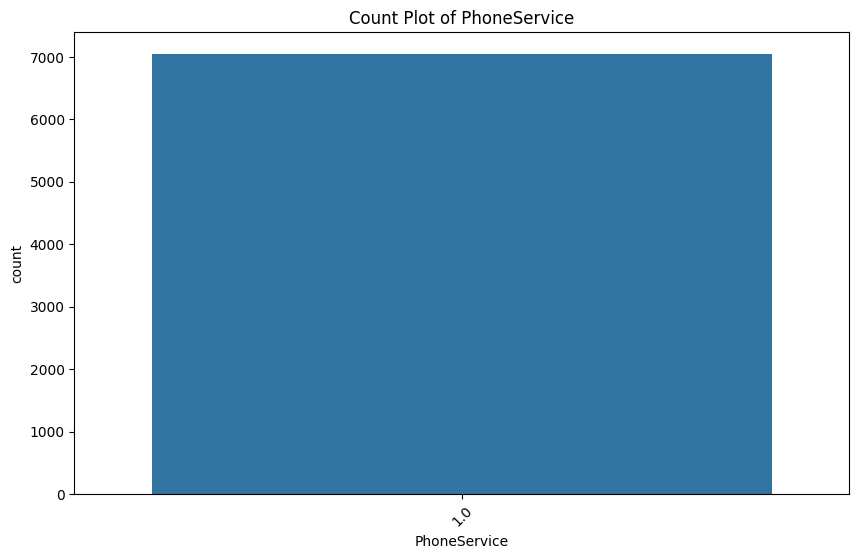

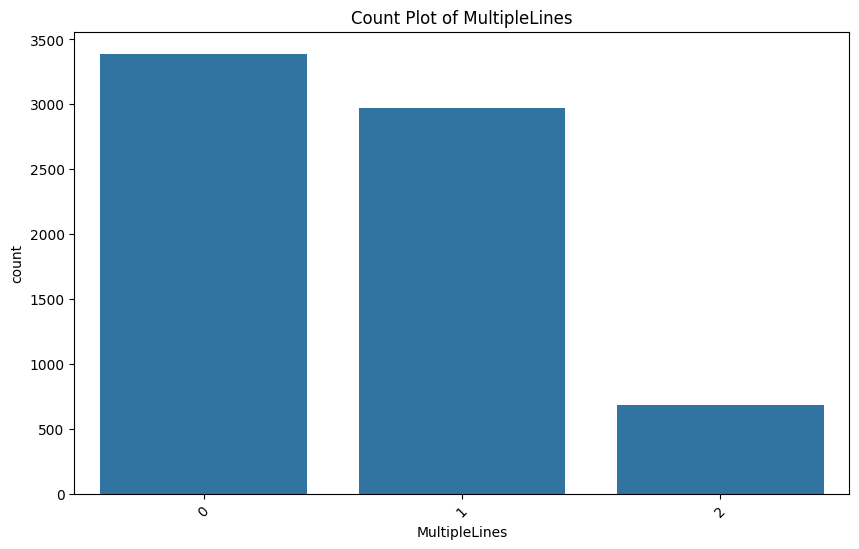

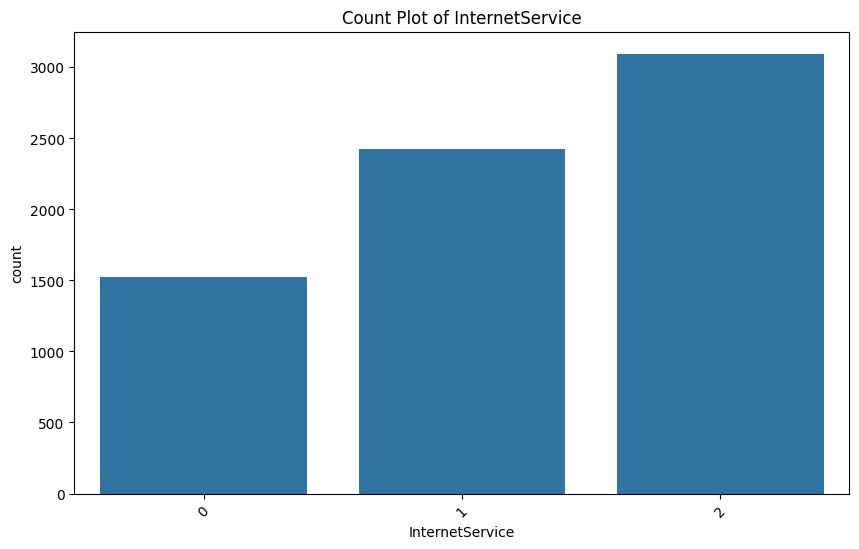

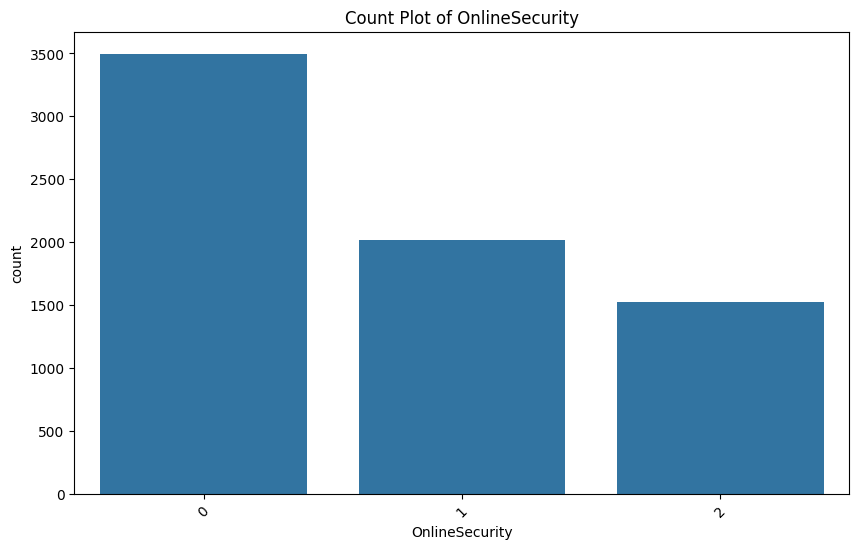

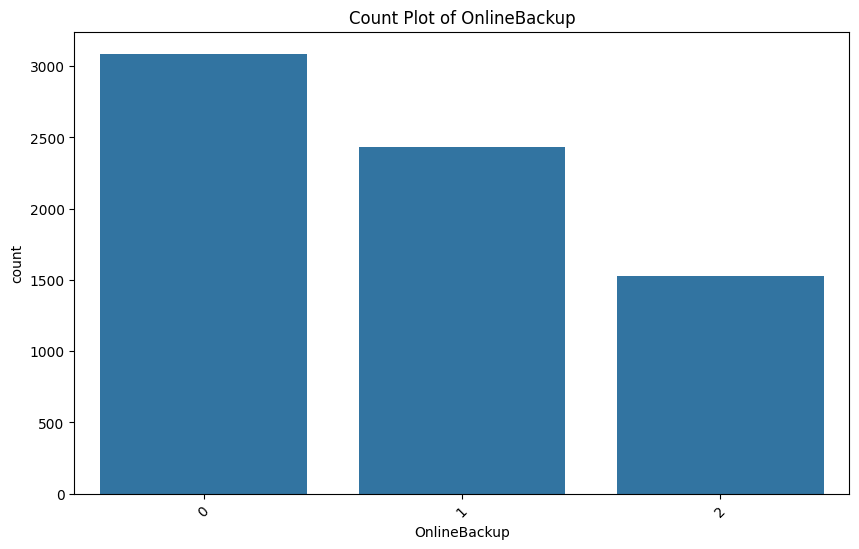

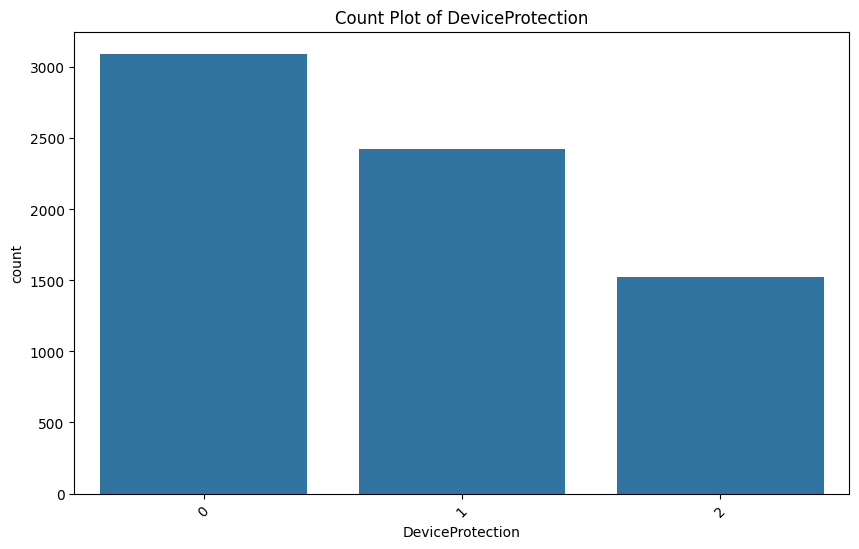

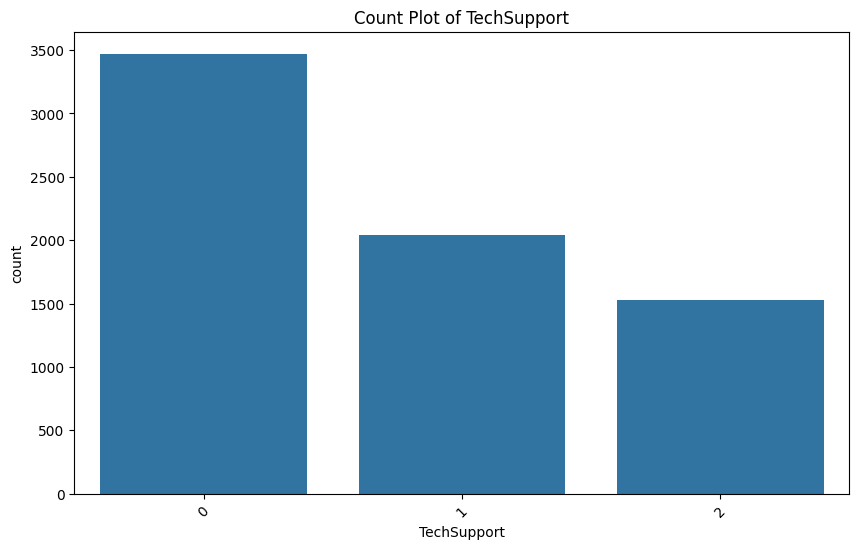

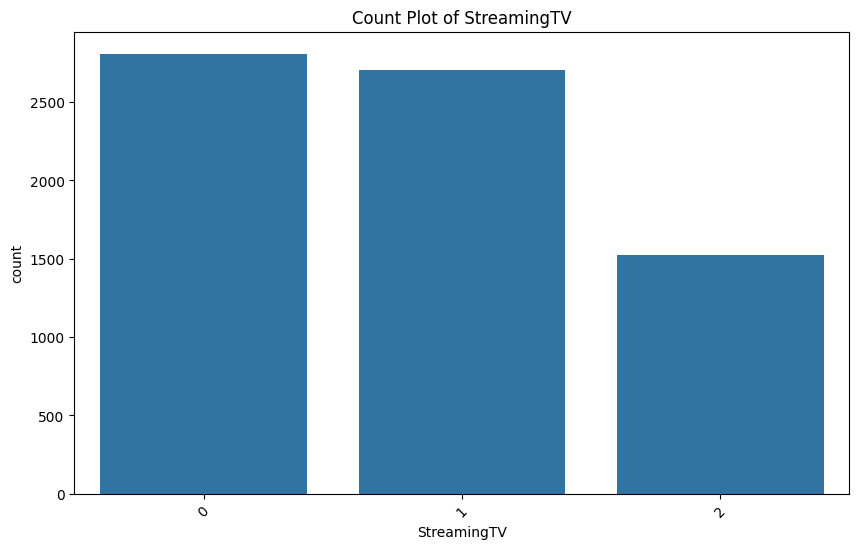

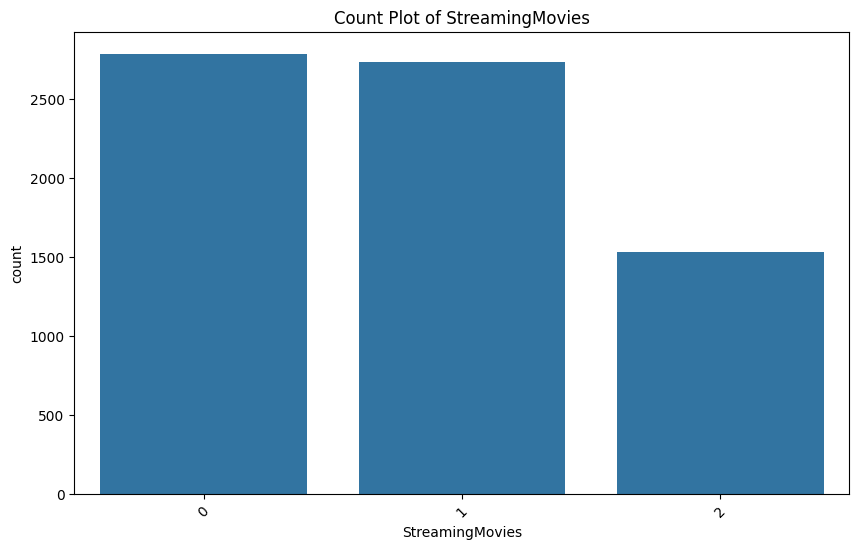

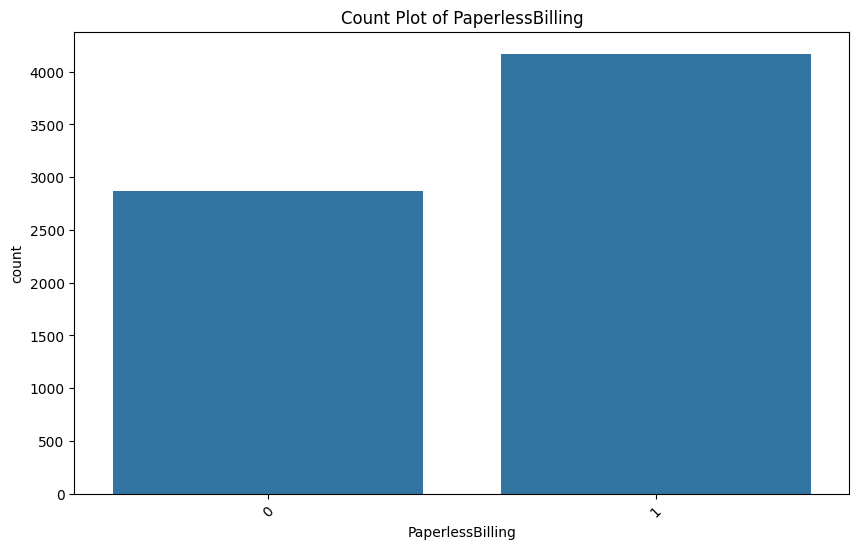

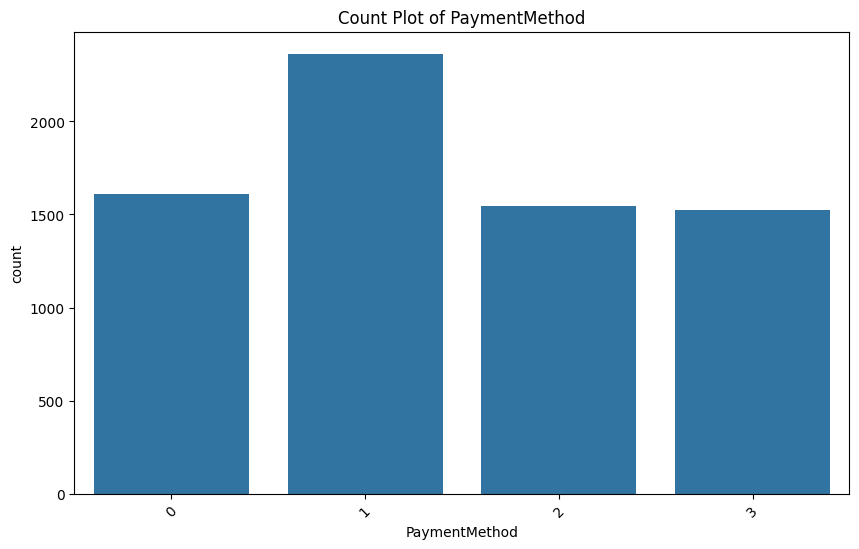

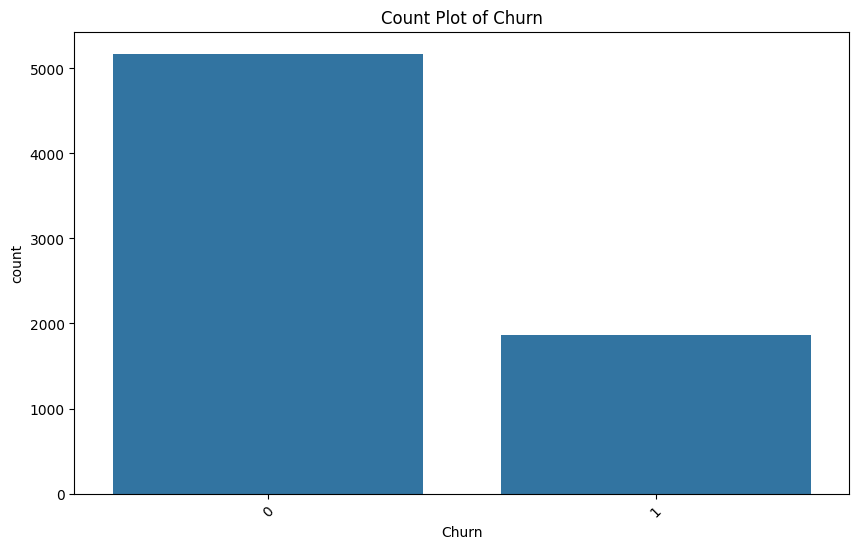

In [941]:
# Categorical Data Visualizations
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()



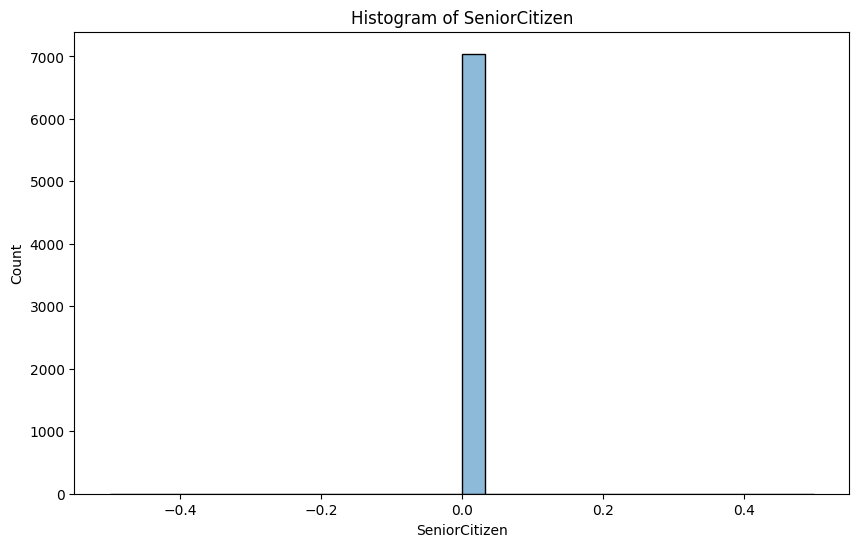

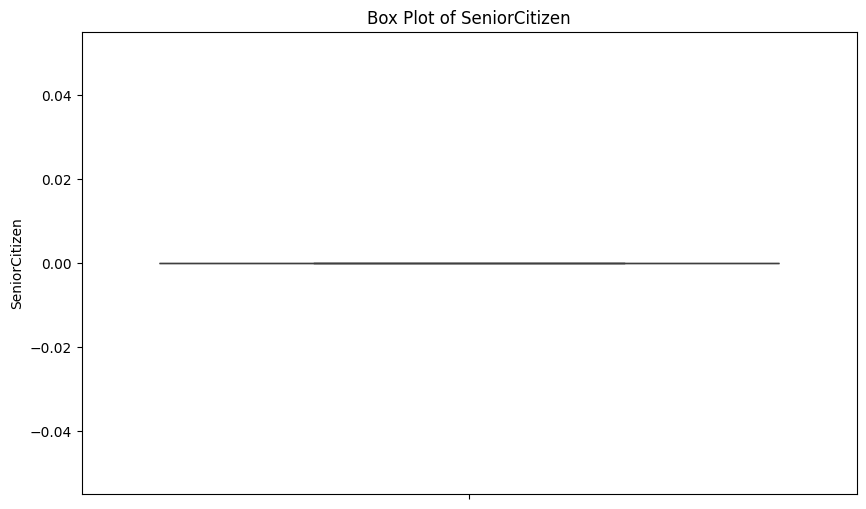

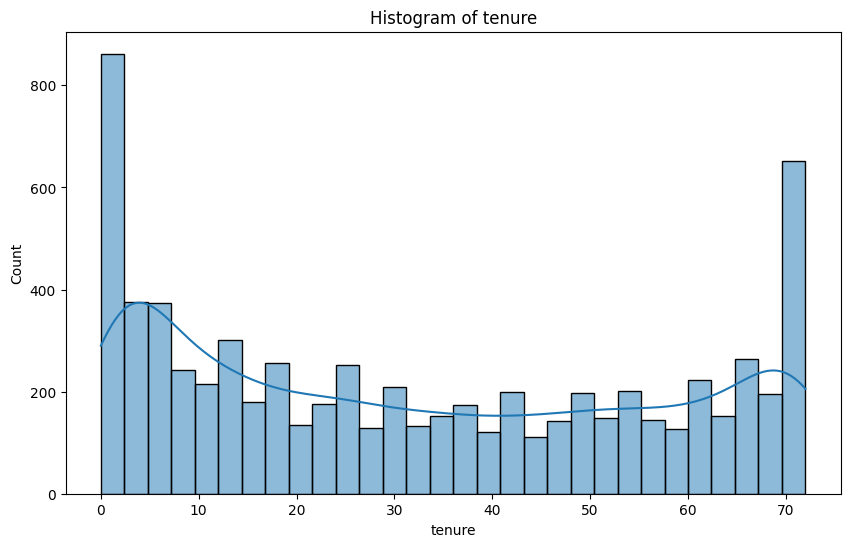

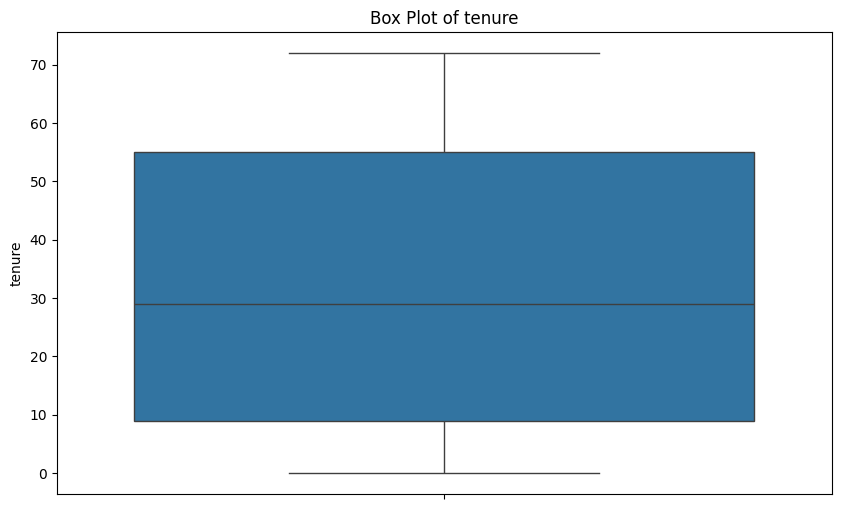

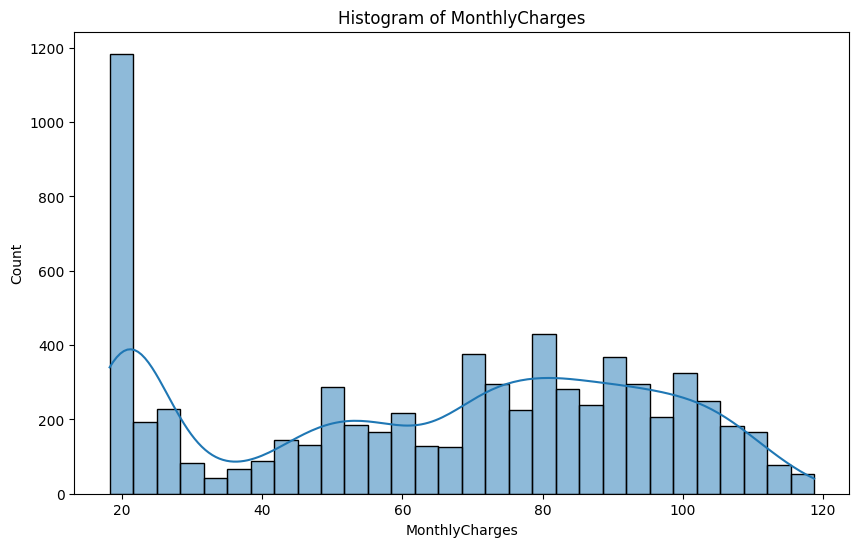

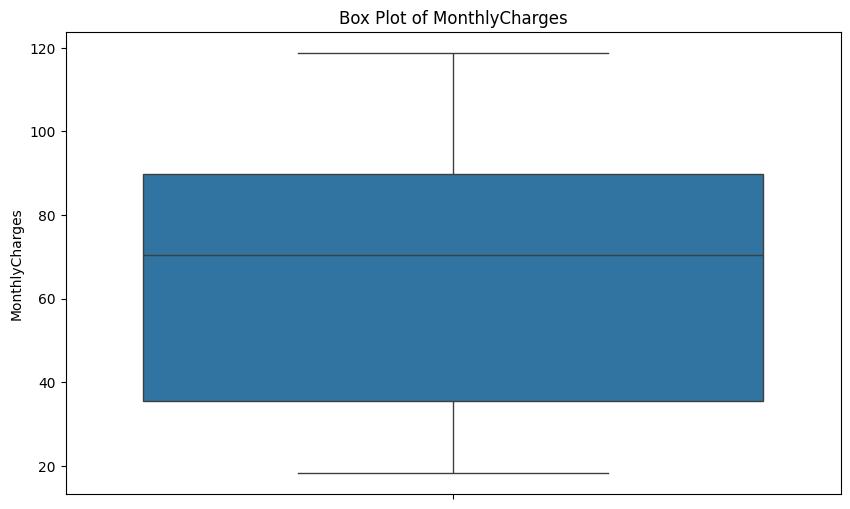

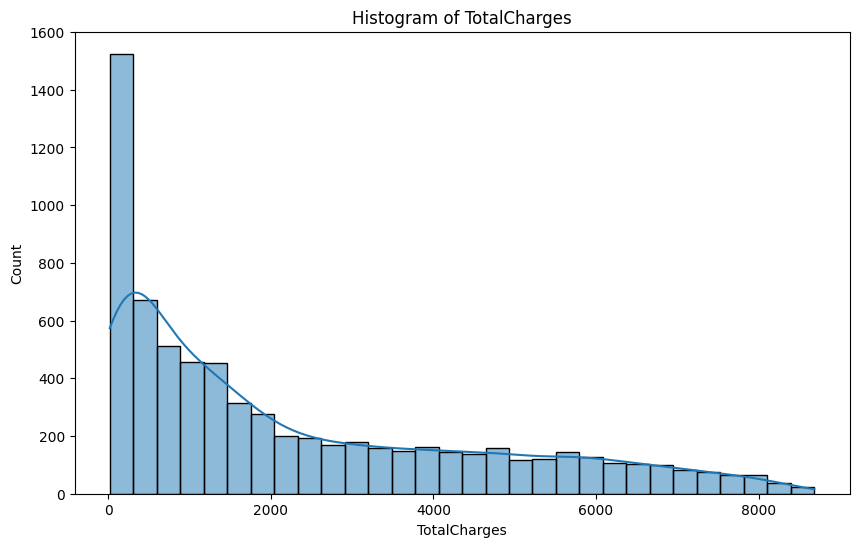

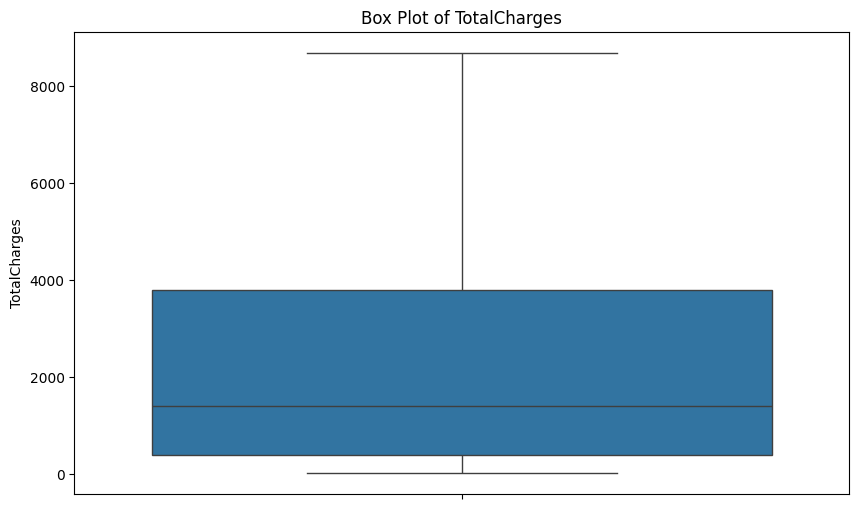

In [942]:
# Numerical Data Visualizations
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



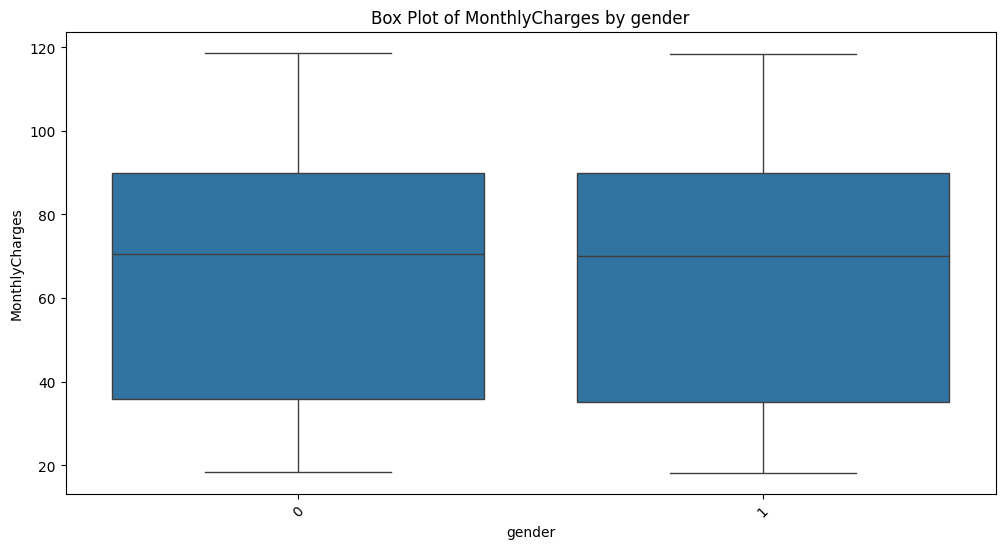

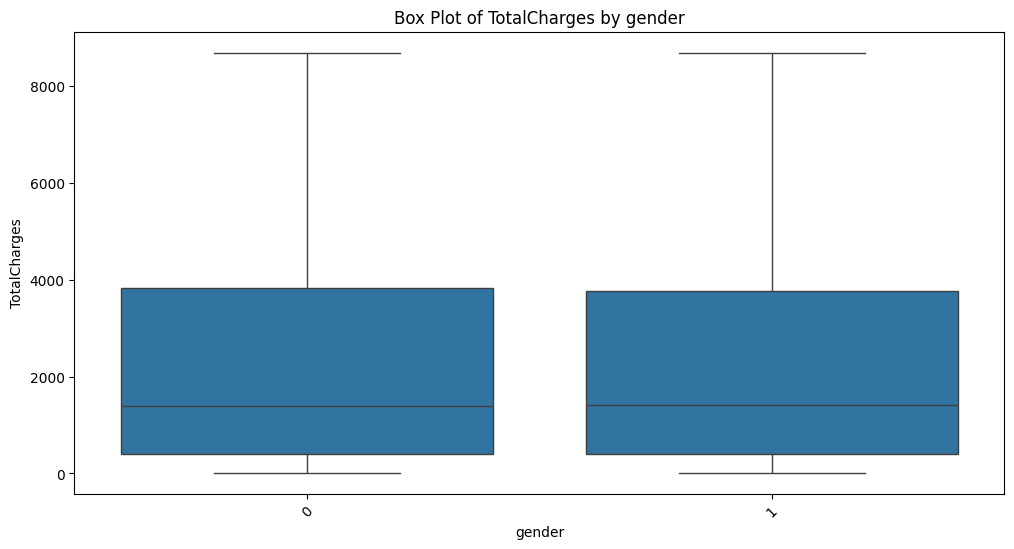

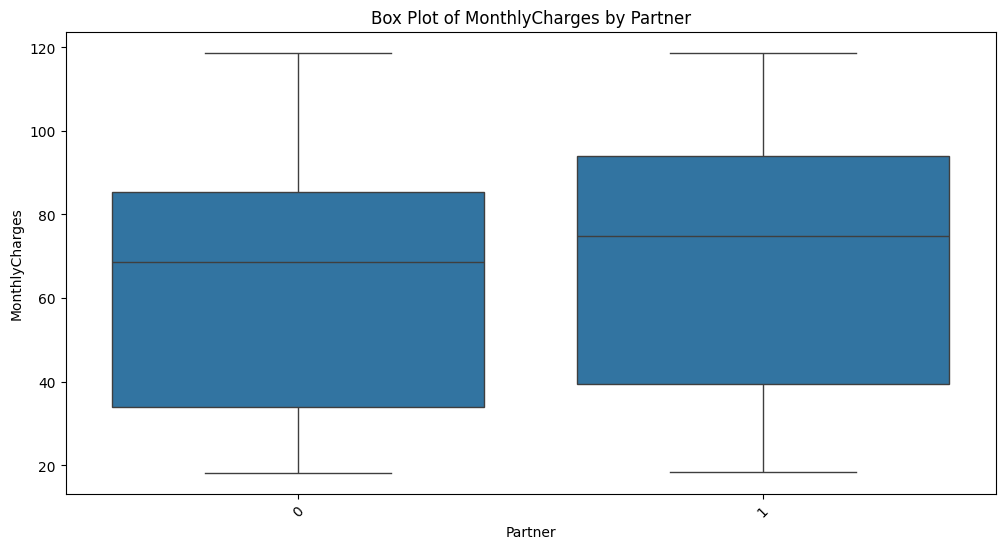

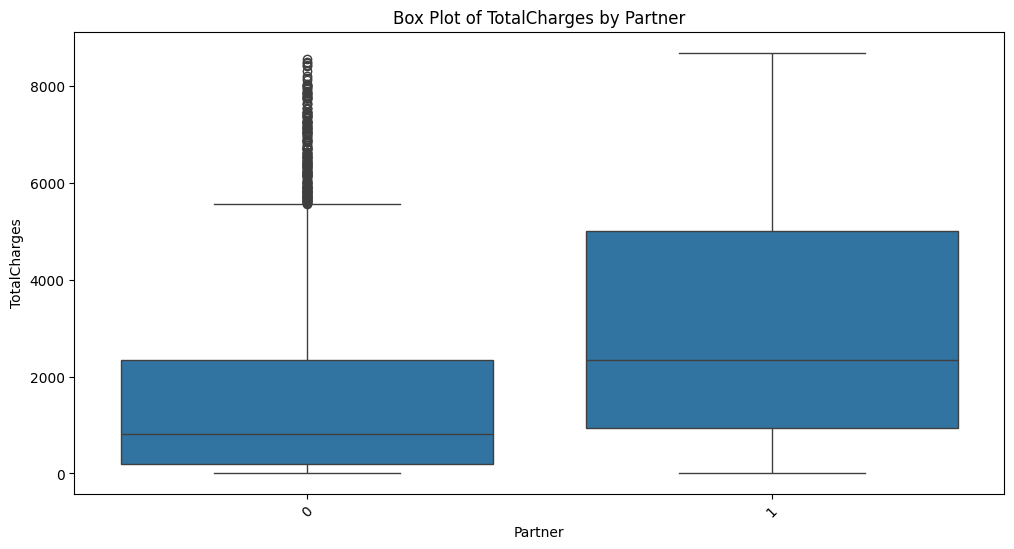

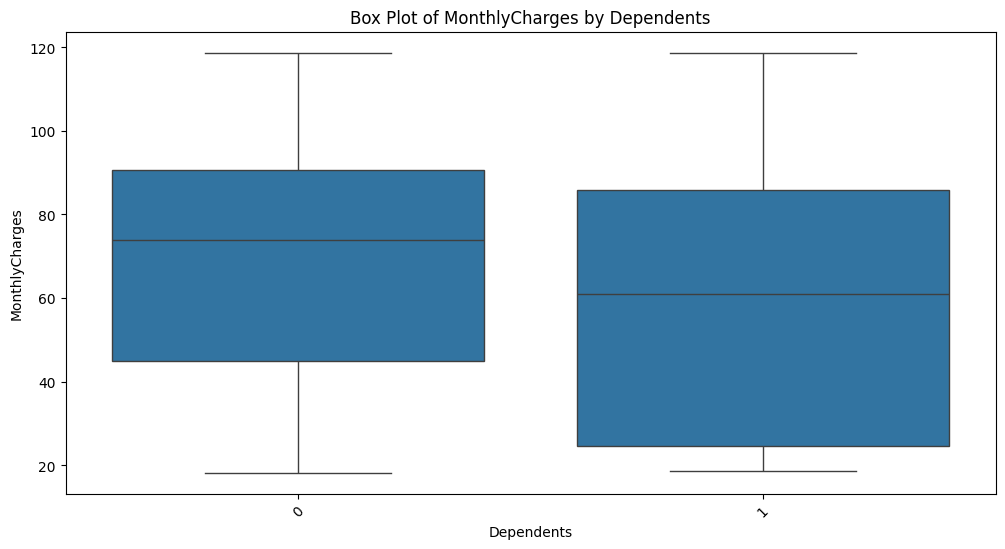

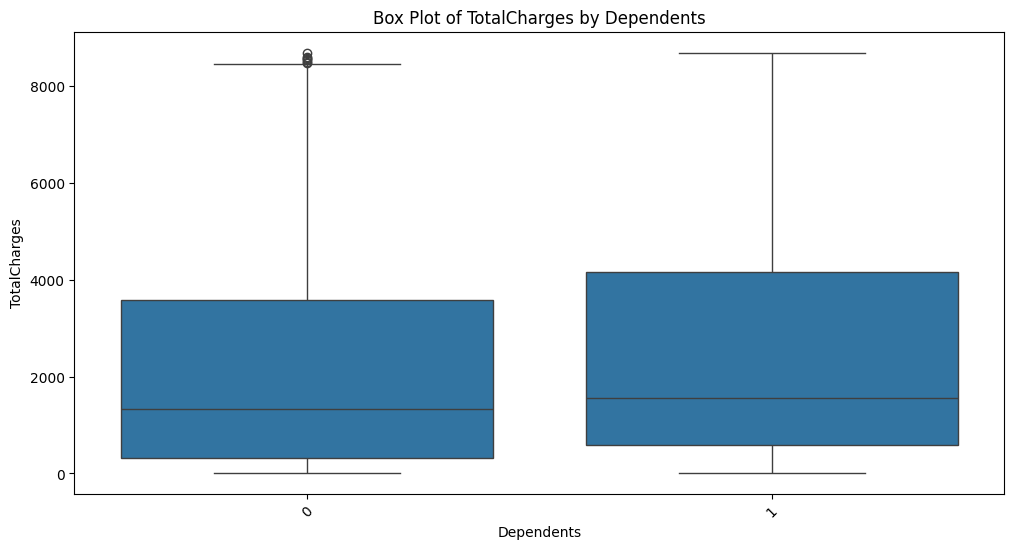

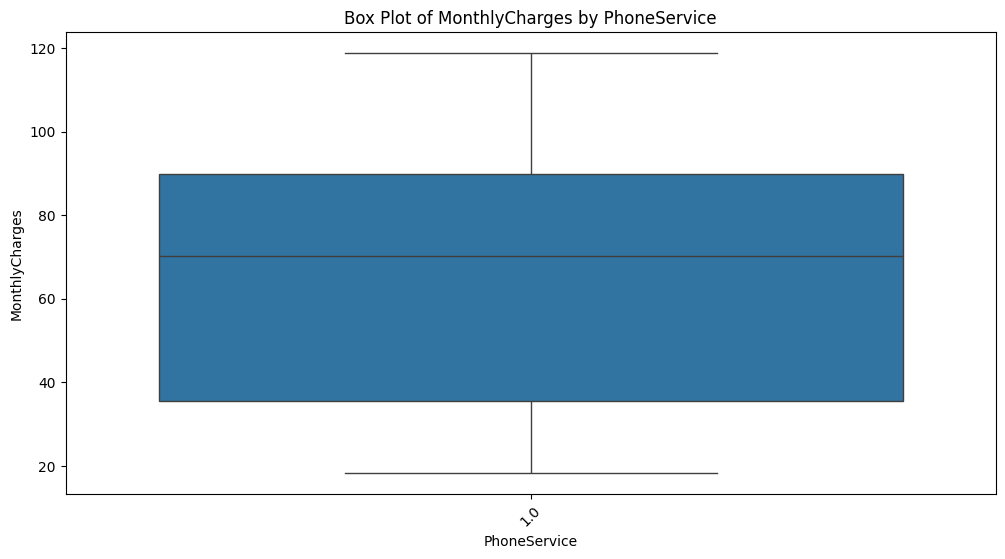

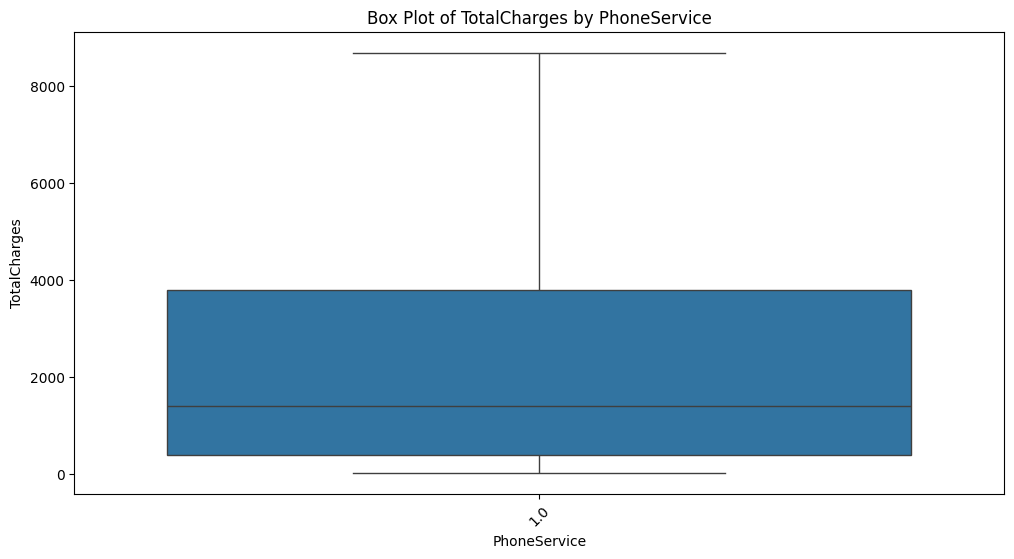

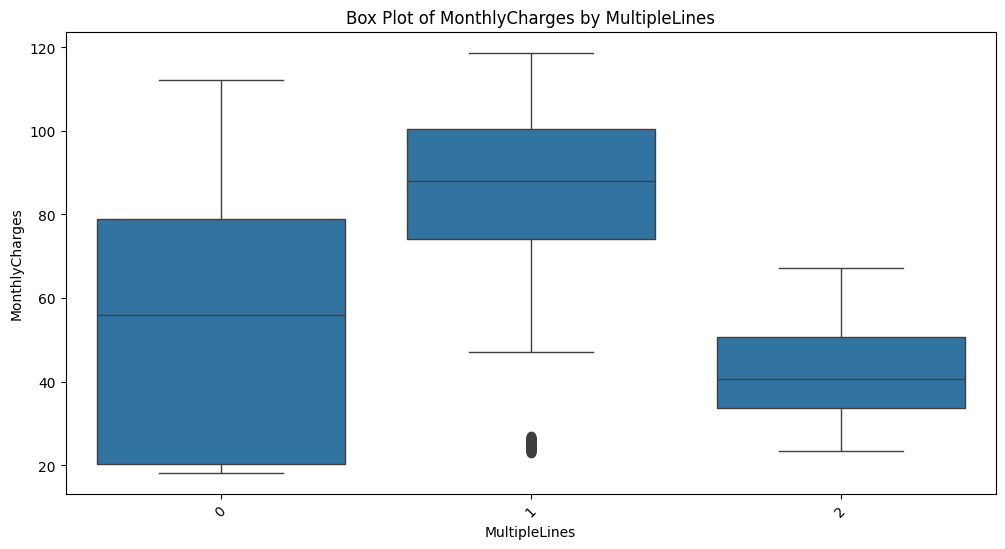

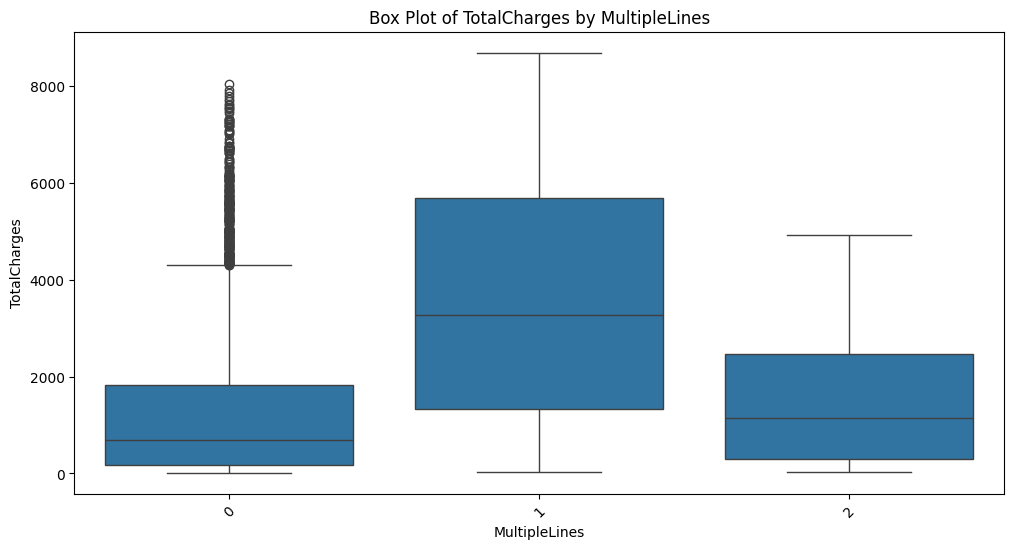

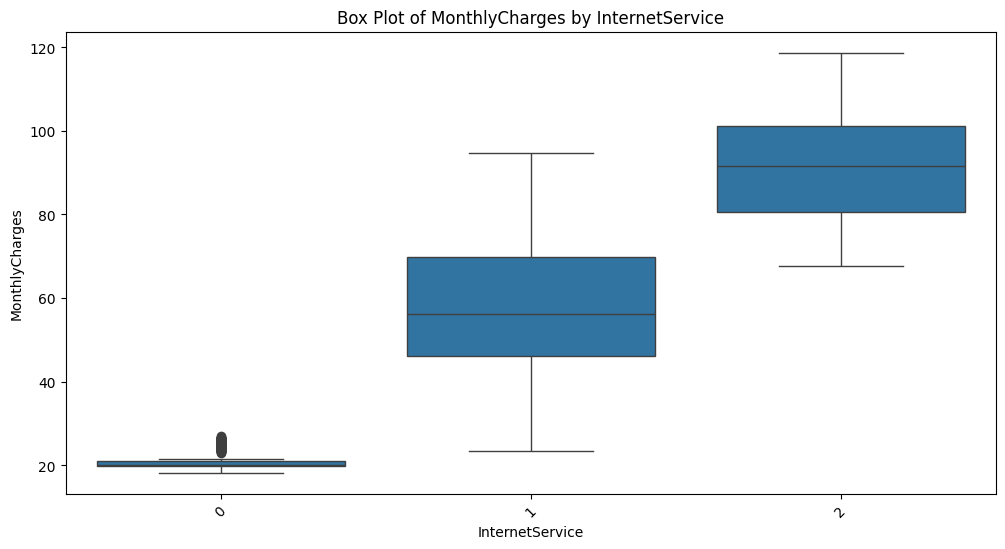

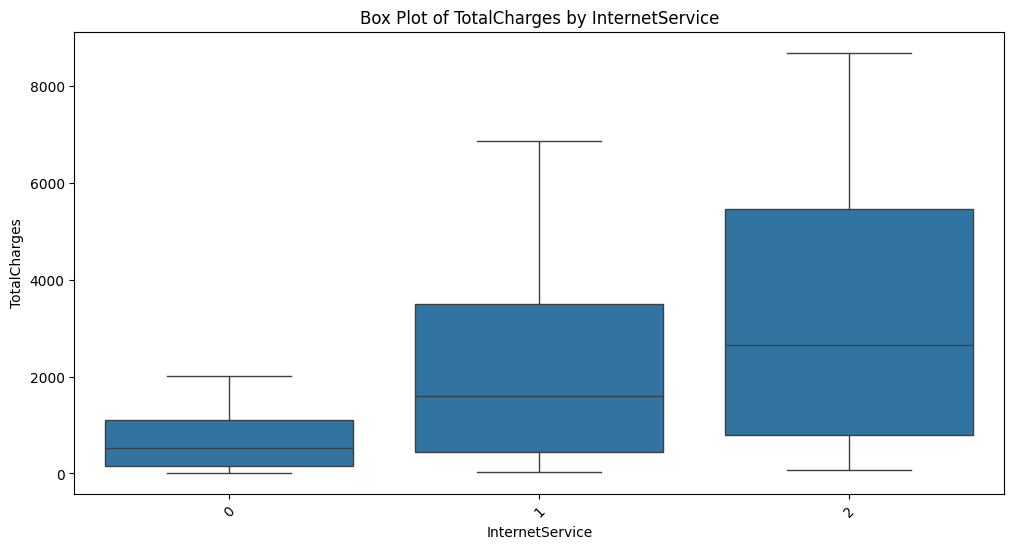

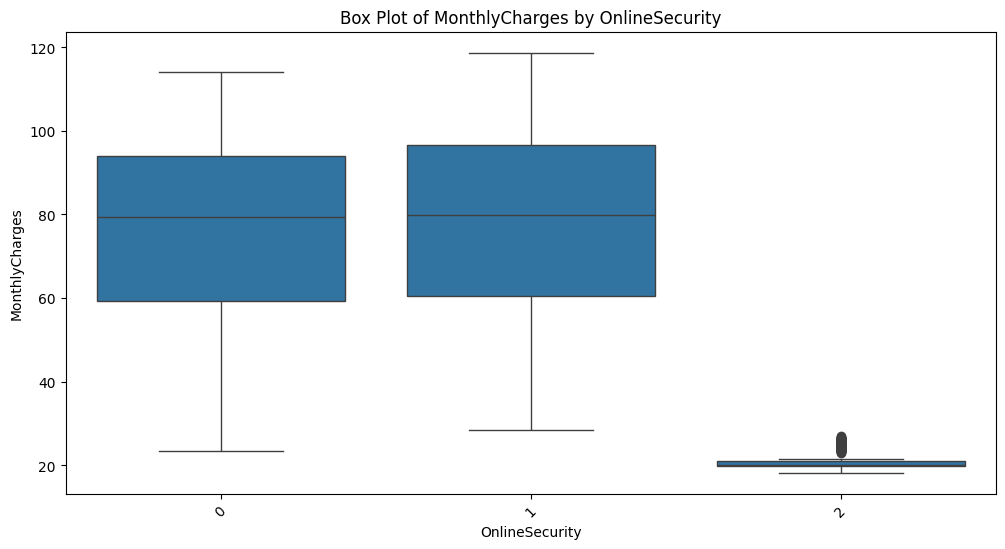

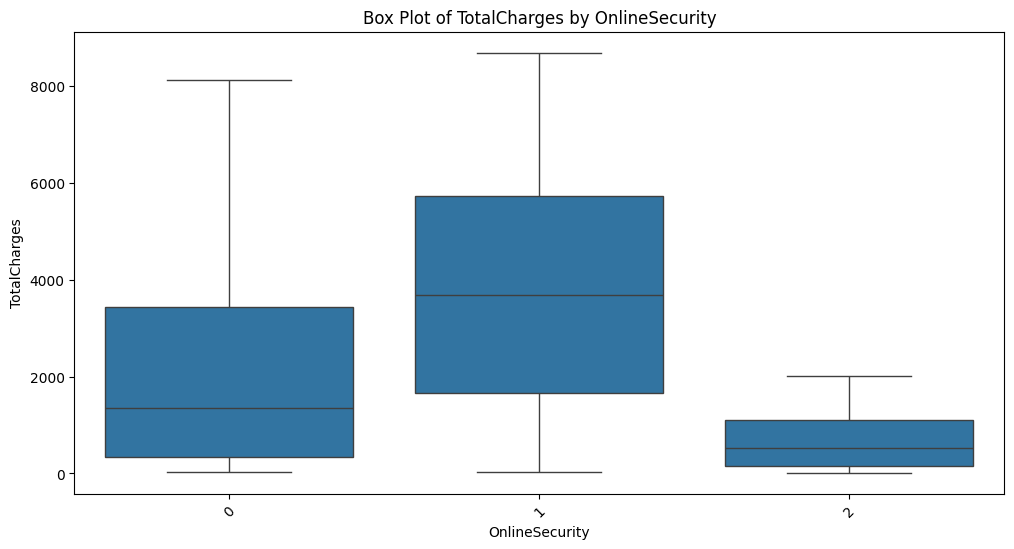

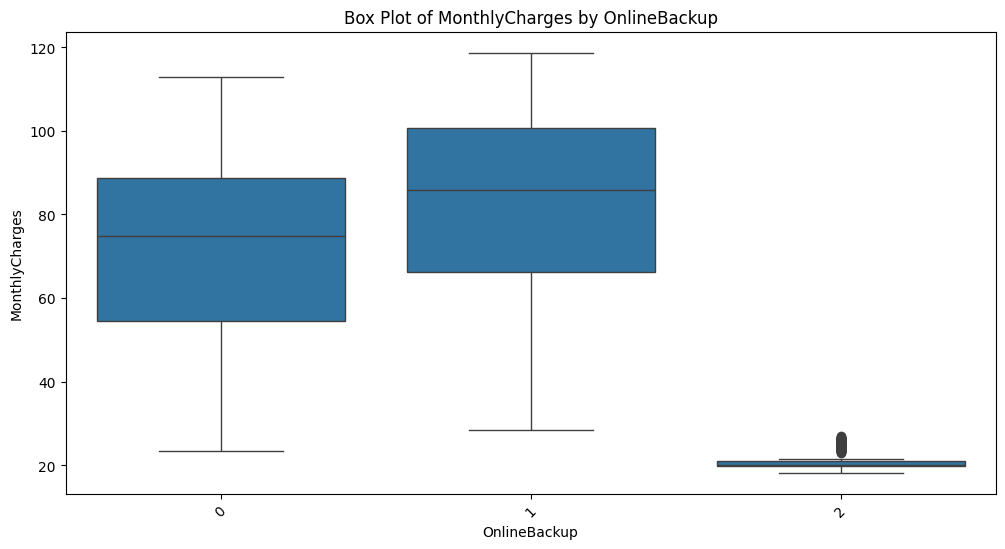

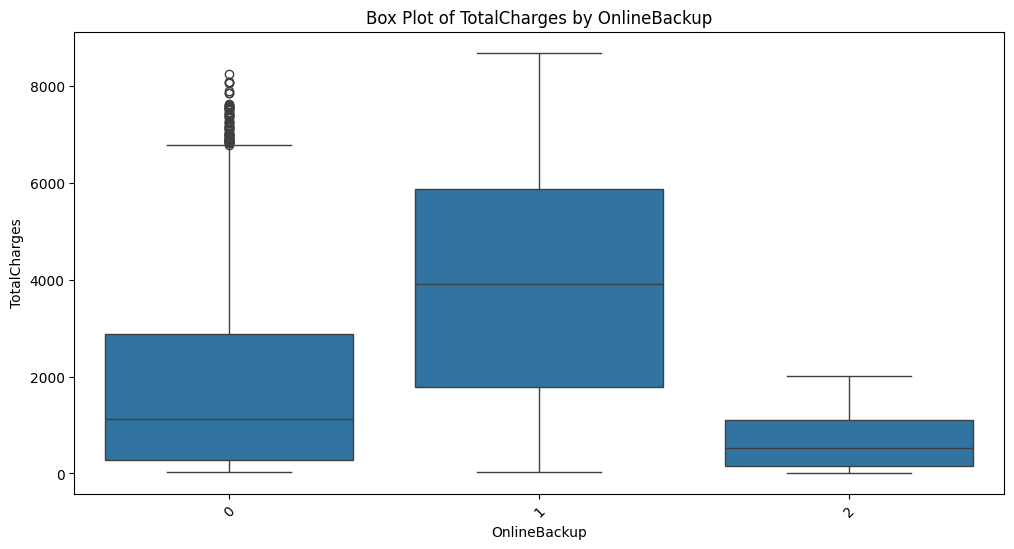

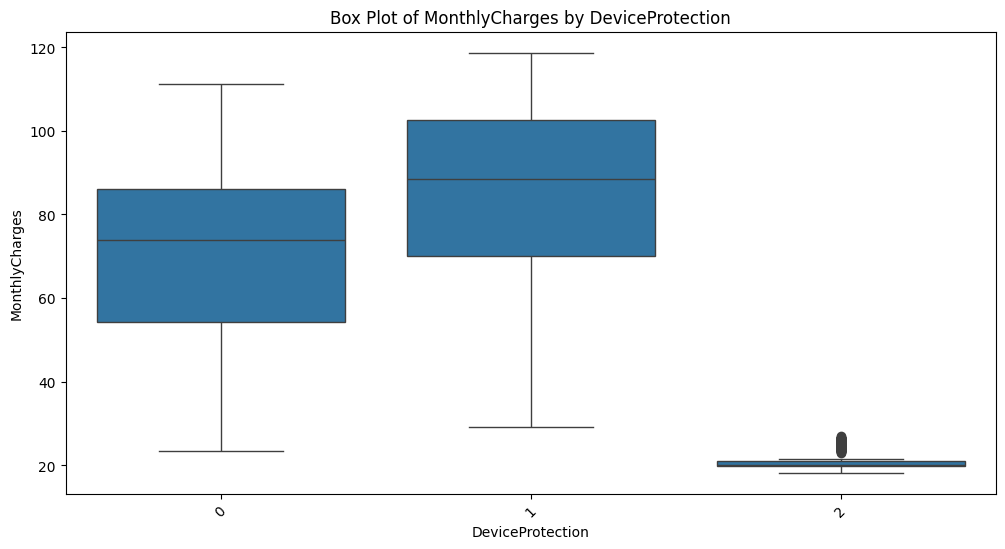

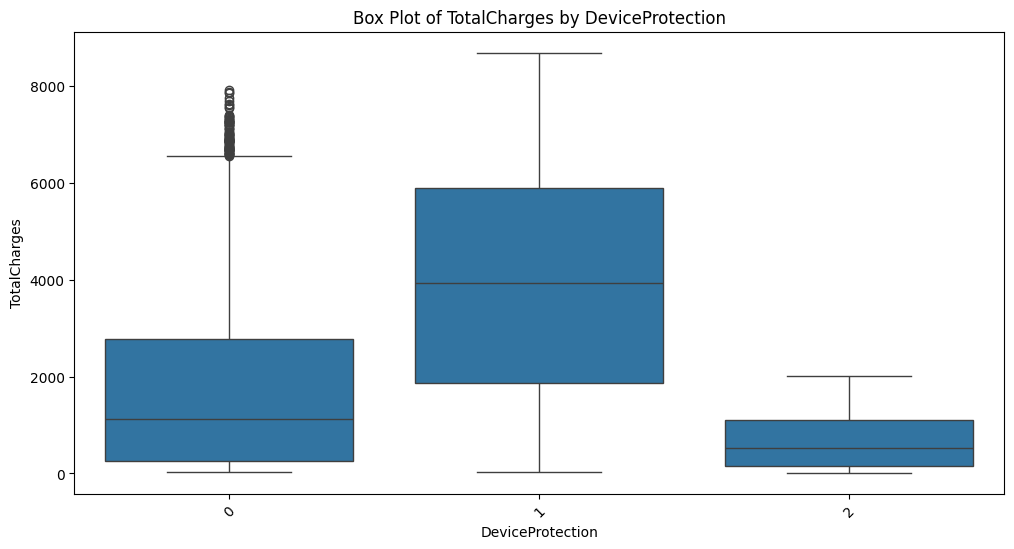

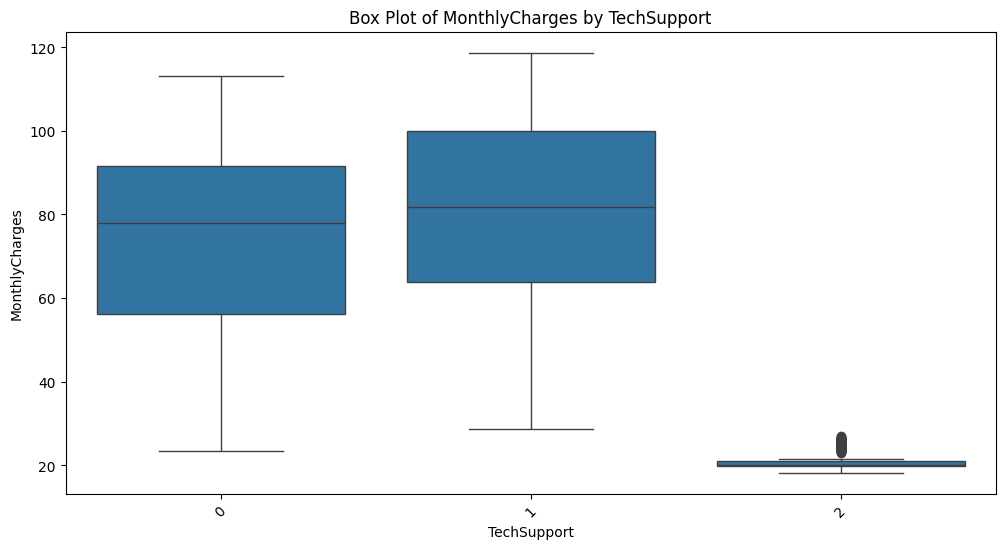

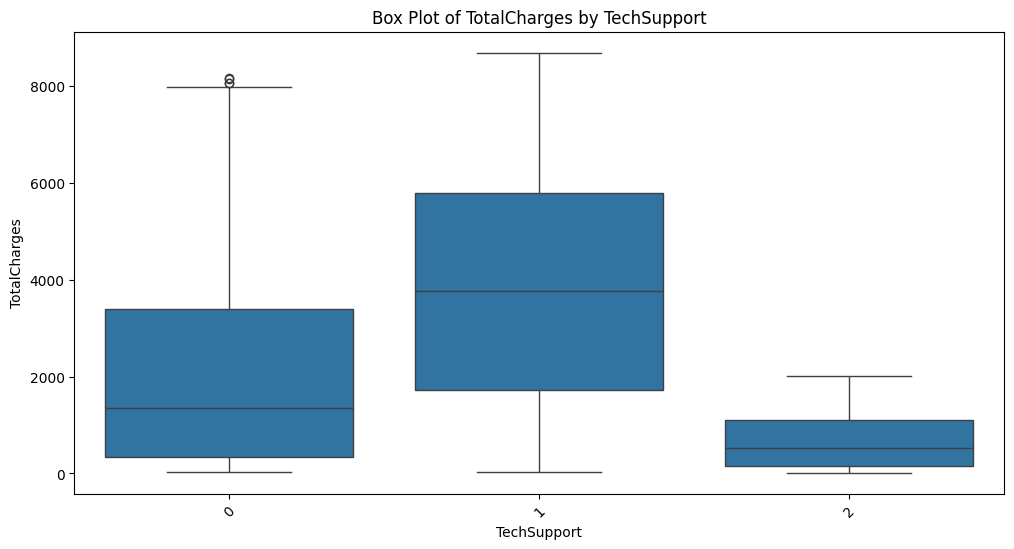

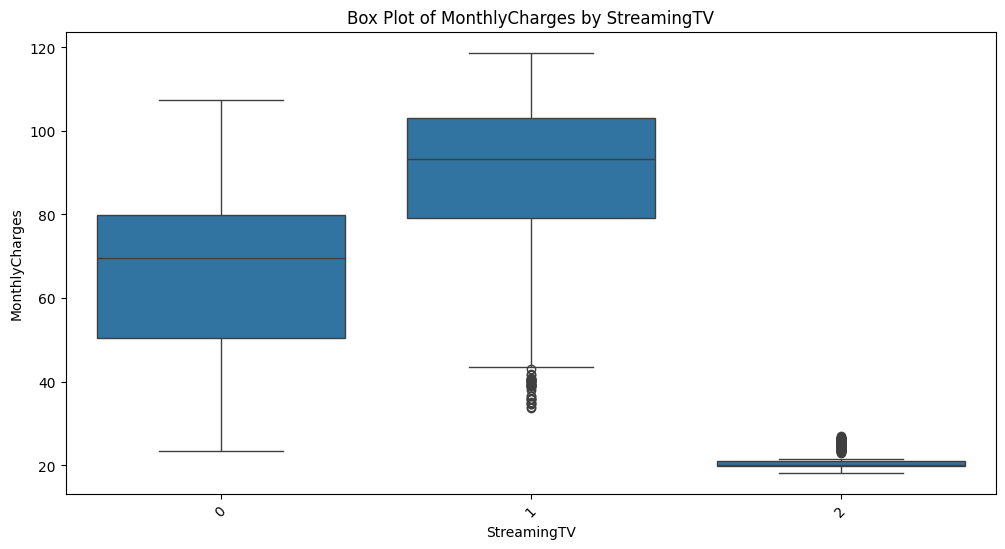

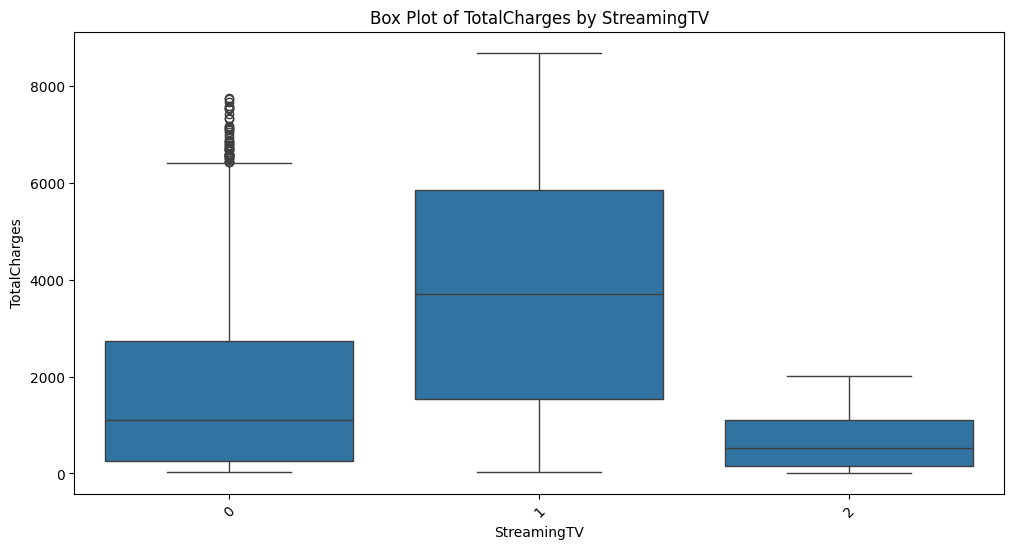

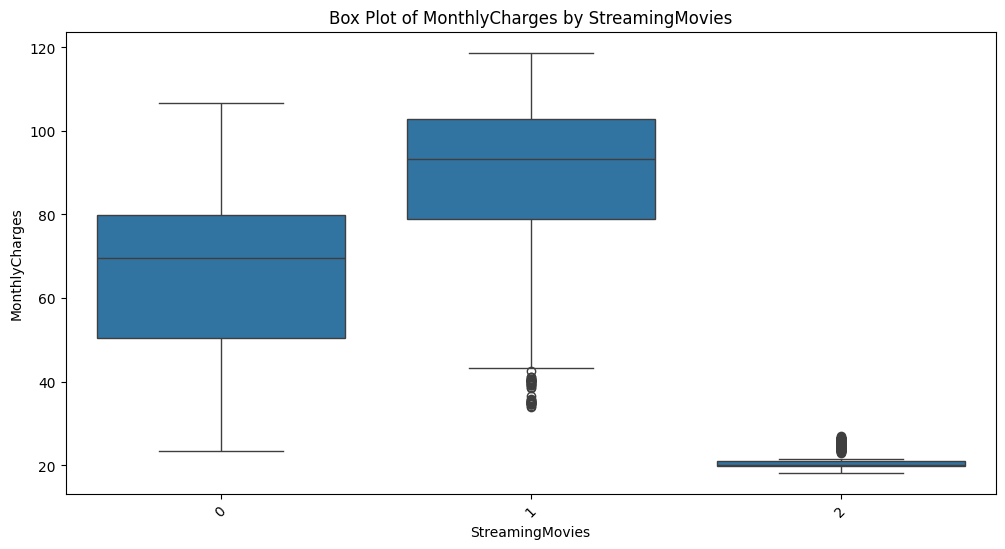

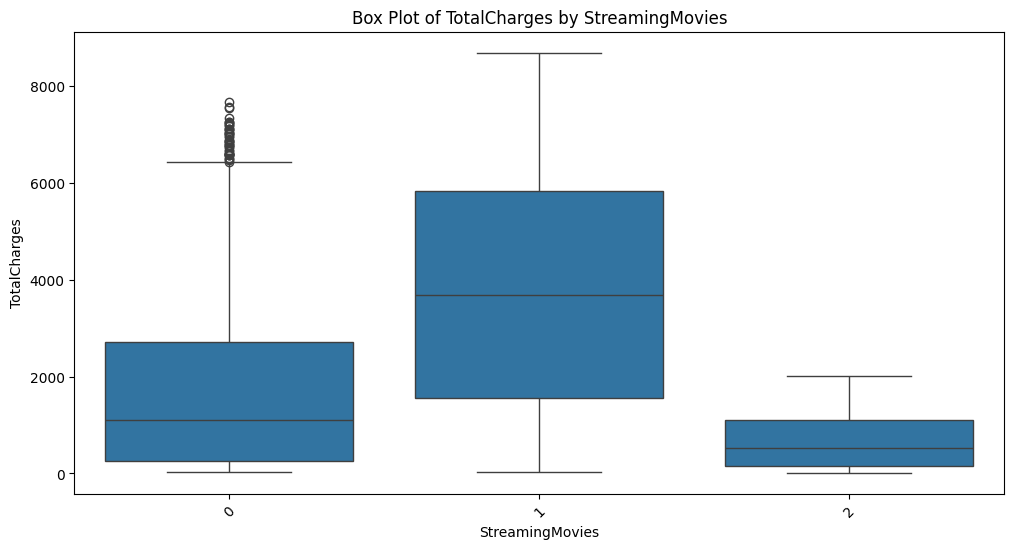

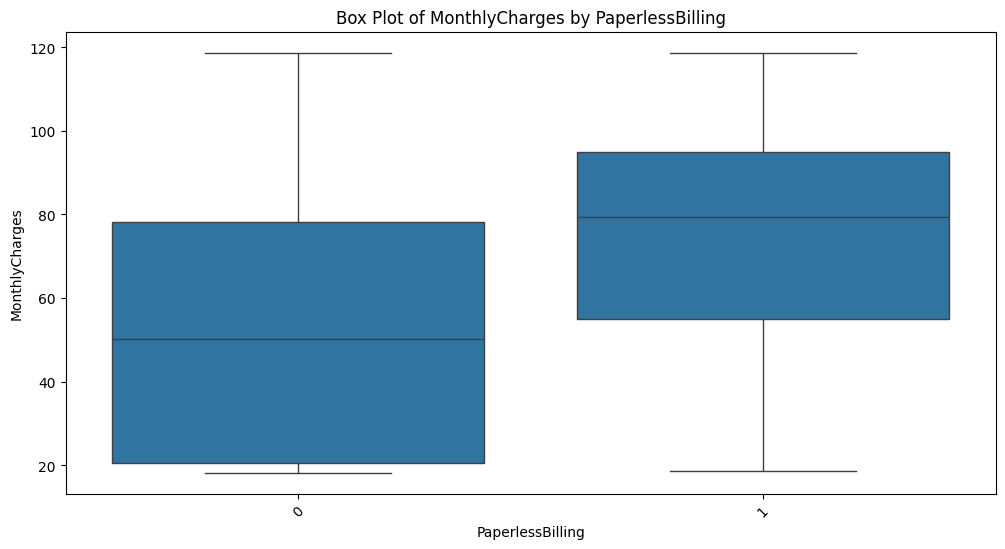

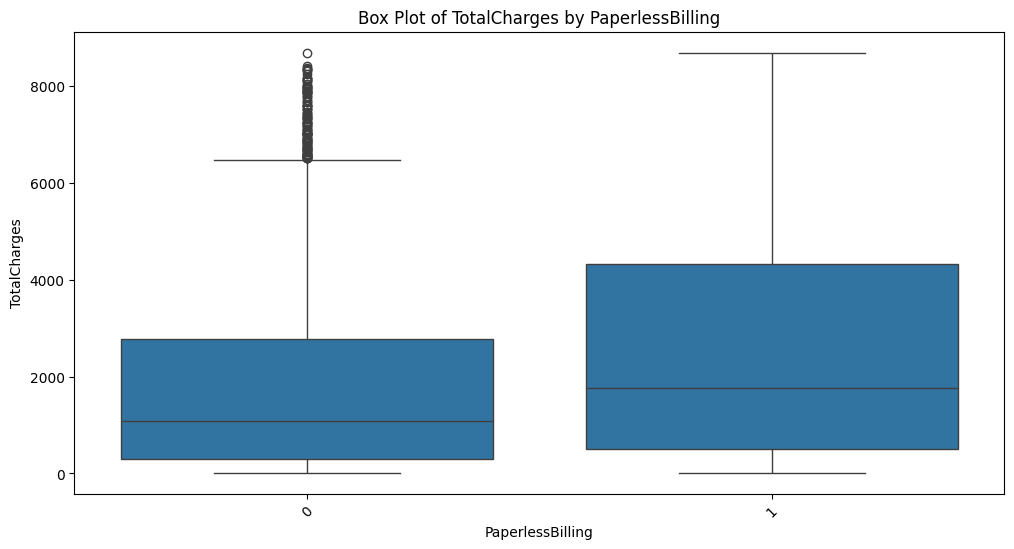

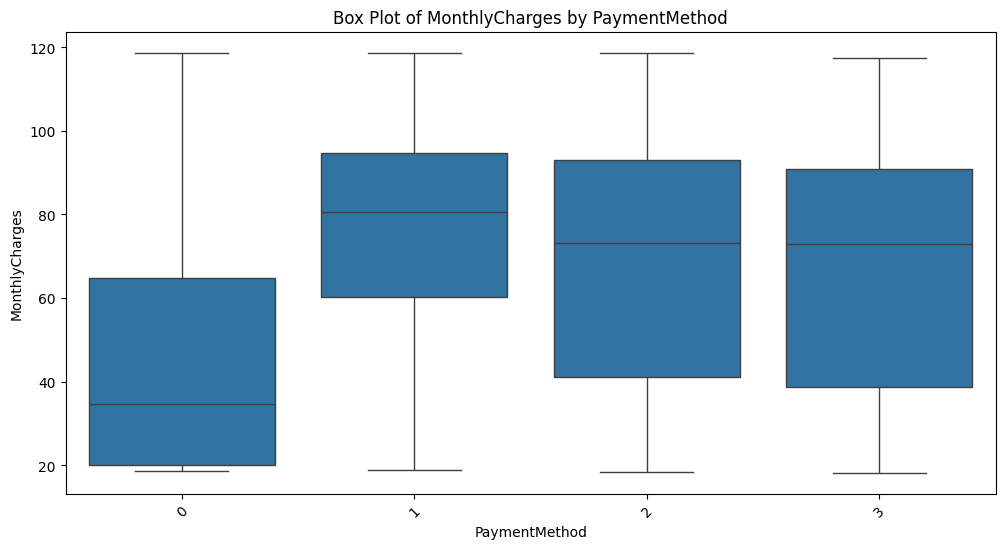

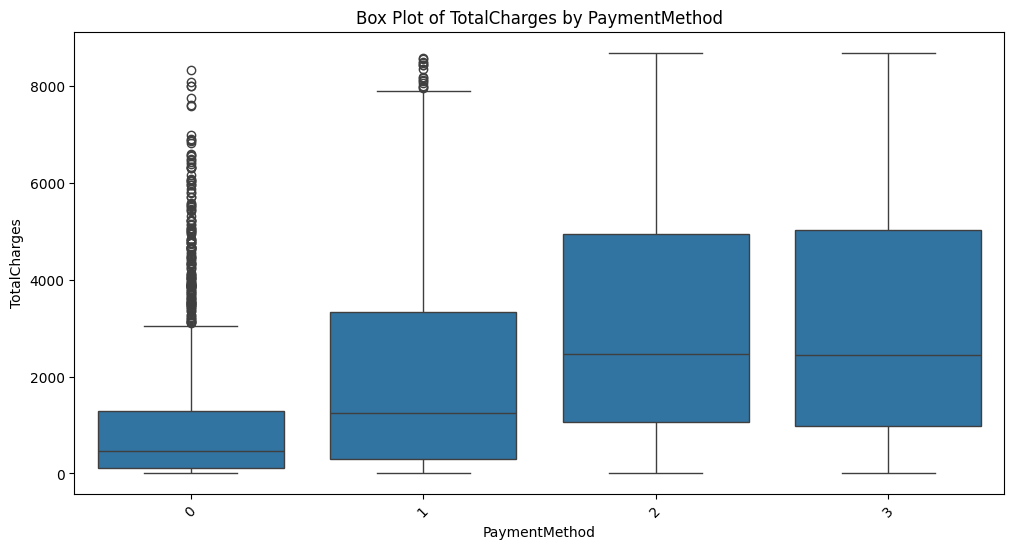

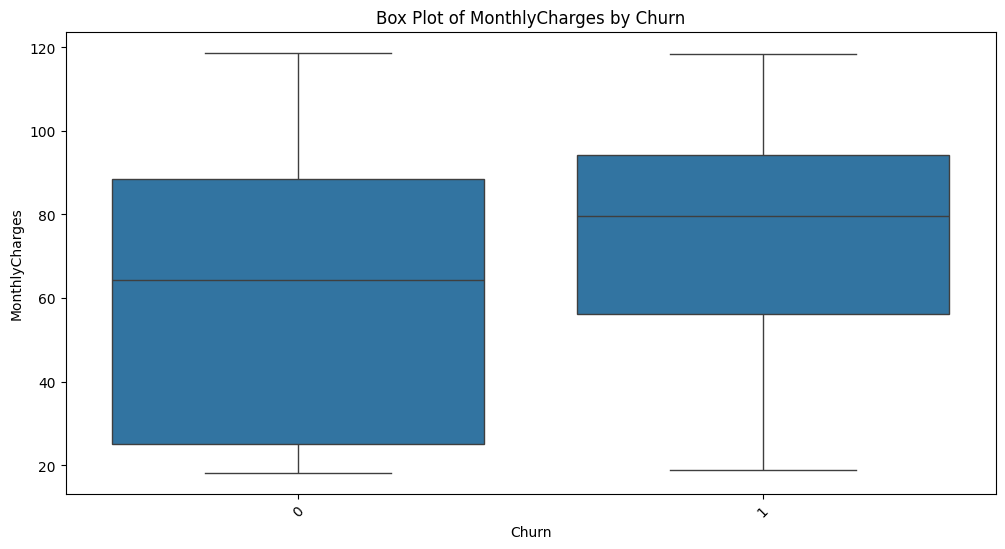

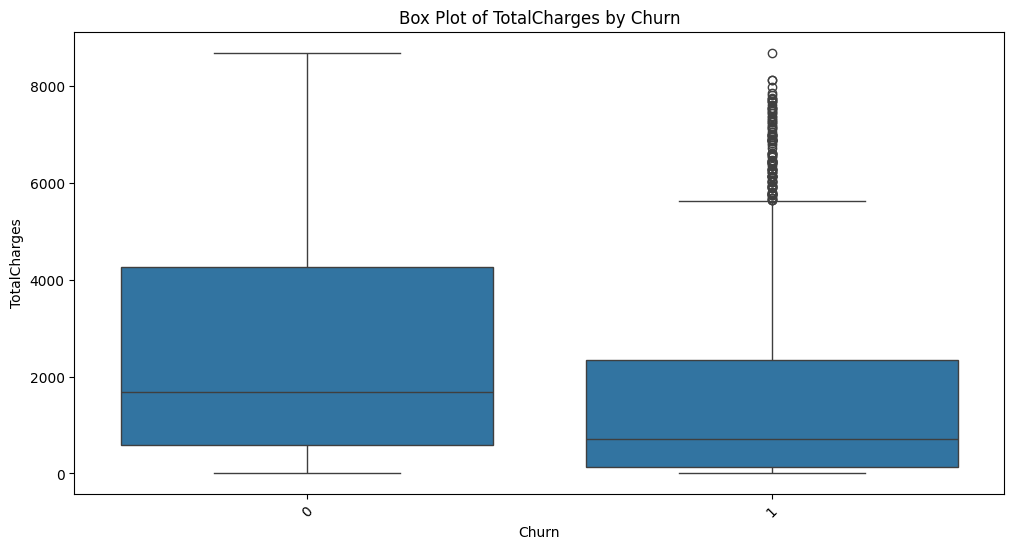

In [943]:
# Mixed Data Visualizations
# Box plots of MonthlyCharges and TotalCharges by categorical variables
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, y='MonthlyCharges')
    plt.title(f'Box Plot of MonthlyCharges by {col}')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, y='TotalCharges')
    plt.title(f'Box Plot of TotalCharges by {col}')
    plt.xticks(rotation=45)
    plt.show()




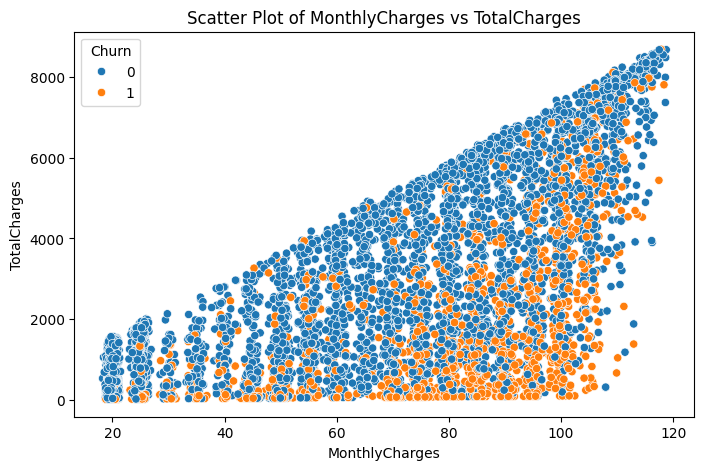

In [944]:
# Scatter plot of MonthlyCharges vs TotalCharges colored by Churn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Scatter Plot of MonthlyCharges vs TotalCharges')
plt.show()



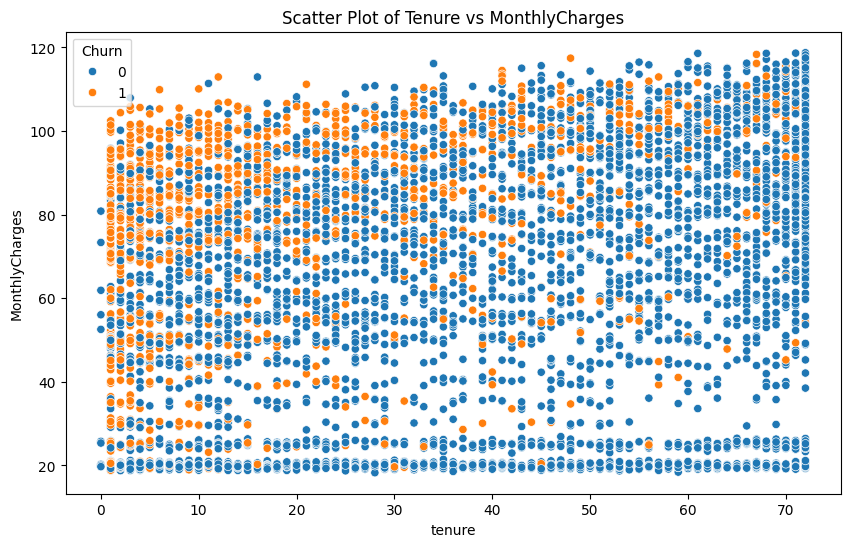

In [945]:
# Scatter plot of tenure vs MonthlyCharges colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Scatter Plot of Tenure vs MonthlyCharges')
plt.show()

## 3. Feature Engineering

In [946]:
#checking the distribution of Target Variable
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

here<br>
1 --> YES <br>
0 -->  NO

In [947]:
print(df.dtypes)

customerID           object
gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure                int64
PhoneService        float64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [948]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1,1.0,2,1,0,1,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34,1.0,0,1,1,0,1,0,0,0,0,0,56.95,1889.50,0
2,3668-QPYBK,1,0.0,0,0,2,1.0,0,1,1,1,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45,1.0,2,1,1,0,1,1,0,0,0,2,42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2,1.0,0,2,0,0,0,0,0,0,1,1,70.70,151.65,1


In [949]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Treating the nan value in TotalCharges column

In [950]:
median_value = df['TotalCharges'].median()

# Replace NaN values in column 'A' with the median value
df['TotalCharges'].fillna(median_value, inplace=True)

median_value = df['TotalCharges'].median()

# Replace NaN values in column 'A' with the median value
df['TotalCharges'].fillna(median_value, inplace=True)

In [951]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [952]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1,1.0,2,1,0,1,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34,1.0,0,1,1,0,1,0,0,0,0,0,56.95,1889.50,0
2,3668-QPYBK,1,0.0,0,0,2,1.0,0,1,1,1,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45,1.0,2,1,1,0,1,1,0,0,0,2,42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2,1.0,0,2,0,0,0,0,0,0,1,1,70.70,151.65,1


In [953]:
# 1. TotalCharges/MonthlyCharges Ratio
df['ChargesRatio'] = df['TotalCharges'] / df['MonthlyCharges']
df['ChargesRatio'] = df['ChargesRatio'].fillna(0)  # Handling any possible division by zero or missing values

# 2. Has Multiple Services
df['HasMultipleServices'] = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                'StreamingTV', 'StreamingMovies']].sum(axis=1) > 1

# 3. Senior and Partner
df['Senior_Partner'] = (df['SeniorCitizen'] == 1) & (df['Partner'] == 'Yes')

# 4. Monthly Charges Category
def categorize_monthly_charges(charges):
    if charges < 30:
        return '0'
    elif 30 <= charges < 60:
        return '1'
    elif 60 <= charges < 90:
        return '2'
    else:
        return '3'

df['MonthlyChargesCategory'] = df['MonthlyCharges'].apply(categorize_monthly_charges)

# 5. Service Count
df['ServiceCount'] = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies']].sum(axis=1)

# 6. Tenure Group
def tenure_group(tenure):
    if tenure <= 12:
        return '1'
    elif tenure <= 24:
        return '2'
    elif tenure <= 36:
        return '3'
    elif tenure <= 48:
        return '4'
    elif tenure <= 60:
        return '5'
    else:
        return '6'

df['TenureGroup'] = df['tenure'].apply(tenure_group)


In [954]:
df['HasMultipleServices'] = df['HasMultipleServices'].astype(int)
df['Senior_Partner'] = df['Senior_Partner'].astype(int)

In [955]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargesRatio,HasMultipleServices,Senior_Partner,MonthlyChargesCategory,ServiceCount,TenureGroup
0,7590-VHVEG,0,0.0,1,0,1,1.0,2,1,0,...,1,29.85,29.85,0,1.000000,1,0,0,5.0,1
1,5575-GNVDE,1,0.0,0,0,34,1.0,0,1,1,...,0,56.95,1889.50,0,33.178227,1,0,1,4.0,3
2,3668-QPYBK,1,0.0,0,0,2,1.0,0,1,1,...,0,53.85,108.15,1,2.008357,1,0,1,4.0,1
3,7795-CFOCW,1,0.0,0,0,45,1.0,2,1,1,...,2,42.30,1840.75,0,43.516548,1,0,1,7.0,4
4,9237-HQITU,0,0.0,0,0,2,1.0,0,2,0,...,1,70.70,151.65,1,2.144979,1,0,2,3.0,1


In [956]:
X=df.drop(columns=['customerID','Churn','TotalCharges','MonthlyCharges','tenure','SeniorCitizen'],axis=1)
Y=df['Churn']

## 4.Building the Churn Prediction Model

In [957]:
# standardization of data
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)

In [958]:
X=standardized_data
Y=df['Churn']

In [959]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [960]:
print(X.shape,X_train.shape,X_test.shape)

(7043, 20) (5634, 20) (1409, 20)


### Model Training

#### 4.1 Logistic Regresssion

In [961]:
# Logistic Regression
model_logistic=LogisticRegression()

In [962]:
#training the LogisticRegression model with Training data
model_logistic.fit(X_train,Y_train)

LogisticRegression()

#### 4.2 RandomForest Classification

In [963]:
# RandomForest code
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'bootstrap': True,
    'random_state': 42
}



In [964]:
#training the RandomForest model with Training data
model_random_forest = RandomForestClassifier(**rf_params)
model_random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

#### 4.3 gradient boosting

In [965]:
# Make predictions on the training set
y_train_pred = gb_regressor.predict(X_train)

# Make predictions on the test set
y_test_pred = gb_regressor.predict(X_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(Y_train, y_train_pred)
mae_train = mean_absolute_error(Y_train, y_train_pred)
r2_train = r2_score(Y_train, y_train_pred)

In [966]:
# Evaluate the model on the test set
mse_test = mean_squared_error(Y_test, y_test_pred)
mae_test = mean_absolute_error(Y_test, y_test_pred)
r2_test = r2_score(Y_test, y_test_pred)

## 5. Model Evalution

#### 5.1 Logistic Regression

In [967]:
#Accuracy Score
#accuracy on training data
X_train_prediction_model_logistic=model_logistic.predict(X_train)
training_data_accuracy_model_logistic=accuracy_score(X_train_prediction_model_logistic,Y_train)

In [968]:
print('Accuracy on Training Data: ',training_data_accuracy_model_logistic)

Accuracy on Training Data:  0.8020944266950657


In [969]:
#Accuracy Score
#accuracy on test data
X_test_prediction_model_logistic=model_logistic.predict(X_test)
testining_data_accuracy_model_logistic=accuracy_score(X_test_prediction_model_logistic,Y_test)

In [970]:
print('Accuracy on Testing  Data: ',testining_data_accuracy_model_logistic)

Accuracy on Testing  Data:  0.8005677785663591


#### 5.2 Random Forest Classifier

In [971]:
random_train = model_random_forest.predict(X_train)


In [972]:
print("Training Accuracy:", accuracy_score(Y_train, random_train))


Training Accuracy: 0.8379481718139865


In [973]:
#Accuracy Score
#accuracy on test data
random_test = model_random_forest.predict(X_test)

In [974]:
print("Testing Accuracy:", accuracy_score(Y_test, random_test))

Testing Accuracy: 0.808374733853797


#### 5.3  gradient boosting

In [975]:


# Print evaluation metrics
print("Training Set Evaluation:")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nTest Set Evaluation:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")



Training Set Evaluation:
Mean Squared Error: 0.13
Mean Absolute Error: 0.26
R-squared: 0.35

Test Set Evaluation:
Mean Squared Error: 0.13
Mean Absolute Error: 0.27
R-squared: 0.32


 ## 6. Calculating Accuracy Precision recall and f1 score

In [976]:
# Calculate additional metrics
accuracy = accuracy_score(Y_test_class, y_test_pred_class)
precision = precision_score(Y_test_class, y_test_pred_class)
recall = recall_score(Y_test_class, y_test_pred_class)
f1 = f1_score(Y_test_class, y_test_pred_class)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.81
Precision: 0.70
Recall: 0.49
F1-Score: 0.58
